# In Class Assignment 2-22-2022

#### Sidney Cox

### Download the data using Panda's DataReader function

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

### Create one dataset per company and collect the data for the year 2021.

In [3]:
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2021,12,31)

In [4]:
target = data.DataReader("TGT", 'yahoo',start, end)
walmart = data.DataReader("WMT",'yahoo',start,end)

In [5]:
target.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,178.089996,174.119995,176.509995,177.630005,3463100.0,174.467789
2021-01-05,181.970001,176.429993,176.800003,180.369995,4843300.0,177.158997
2021-01-06,189.470001,180.110001,180.330002,188.919998,5610100.0,185.556793
2021-01-07,192.350006,189.169998,189.210007,191.100006,4226700.0,187.697998
2021-01-08,193.880005,190.809998,191.580002,193.600006,3321500.0,190.153503


### Create the columns %-chg and Log returns for both companies.

In [21]:
target['%-chg'] = target['Close'].pct_change()
walmart['%-chg'] = walmart['Close'].pct_change()

target['Log returns'] = np.log(target['Close']/target['Close'].shift())
walmart['Log returns'] = np.log(walmart['Close']/walmart['Close'].shift())

In [22]:
target.head()

,High,Low,Open,Close,Volume,Adj Close,%-chg,Log returns
Date,,,,,,,,
2021-01-04,178.089996,174.119995,176.509995,177.630005,3463100.0,174.467789,NaN,NaN
2021-01-05,181.970001,176.429993,176.800003,180.369995,4843300.0,177.158997,0.015425,0.015308
2021-01-06,189.470001,180.110001,180.330002,188.919998,5610100.0,185.556793,0.047403,0.046313
2021-01-07,192.350006,189.169998,189.210007,191.100006,4226700.0,187.697998,0.011539,0.011473
2021-01-08,193.880005,190.809998,191.580002,193.600006,3321500.0,190.153503,0.013082,0.012997


### Create a combined plot of the volumes for both companies. Comment on the results.

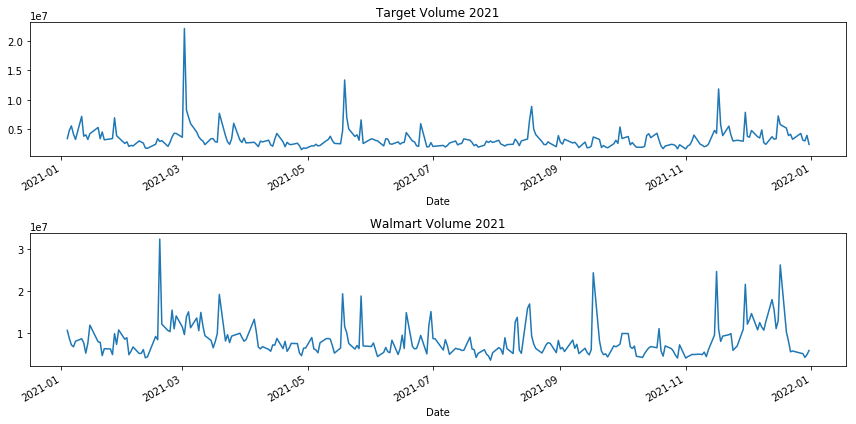

In [9]:
fig, ax = plt.subplots(2)
target['Volume'].loc['2021-01-01':].plot(ax=ax[0], title="Target Volume 2021", figsize=(12,6))
walmart['Volume'].loc['2021-01-01':].plot(ax=ax[1], title="Walmart Volume 2021", figsize=(12,6))

fig.tight_layout()

For both Target and Walmart, they experience a very high volume in March of 2021. However, after March 2021, Target's volume was decreased and stayed low for the rest of the year. On the other hand, Walmart's volume decreased after March 2021, but increased as the year went on. While the volume never got be to what it was in March, it was still pretty high for Walmart. 

### Create a combined plot of the log returns on both companies and comment on the results.

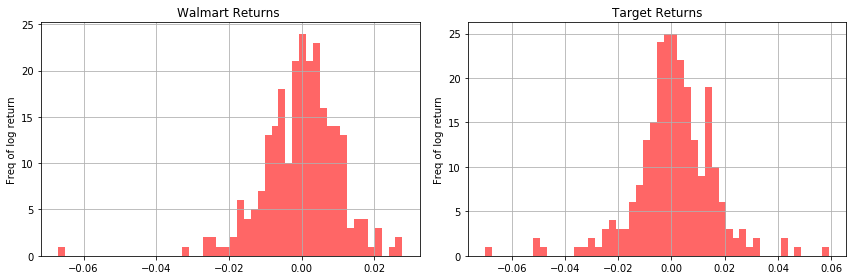

In [12]:
fig, ax = plt.subplots(1,2)
walmart['Log returns'].hist(ax=ax[0], bins=50, alpha=0.6, color='r', figsize=(12,4))
ax[0].set_ylabel("Freq of log return")
ax[0].set_title("Walmart Returns ")

target['Log returns'].hist(ax=ax[1], bins=50, alpha=0.6, color='r', figsize=(12,4))
ax[1].set_ylabel("Freq of log return")
ax[1].set_title("Target Returns")

fig.tight_layout()

Looking at the returns, they are kind of similar. Target has a more normalized structure while Walmart does not. However, Walmart has more losses than Target does as the graph is thicker on the negative side. 

### Calculate the volatility for both companies and comment on the results.

In [15]:
target['Log returns'].std()

0.014964775897820567

In [16]:
walmart['Log returns'].std()

0.010566097093939207

In [19]:
target_vol = target['Log returns'].std()*np.sqrt(252)
walmart_vol = walmart['Log returns'].std()*np.sqrt(252)
target_vol

0.2375584527086793

In [20]:
walmart_vol

0.16773159143475252

The volatility for target is higher than the volatility for walmart. This means that investing in target is riskier than investing in walmart. 